**Q1. What is supervised, unsupervised, and reinforcement learning?**

### 🔹 Supervised Learning
- Model learns from **labeled data** (inputs + outputs).  
- Goal: predict outcomes for new data.  
- Examples: regression, classification.  
- Real-world: spam detection, house price prediction.

### 🔹 Unsupervised Learning
- Model learns from **unlabeled data** (no outputs).  
- Goal: find structure/patterns.  
- Examples: clustering, dimensionality reduction.  
- Real-world: customer segmentation, topic modeling.

### 🔹 Reinforcement Learning (RL)
- Agent interacts with environment, learns via **rewards & penalties**.  
- Goal: maximize long-term reward.  
- Examples: Q-learning, policy gradient.  
- Real-world: game playing (AlphaGo), robotics.

---

✅ **Key takeaway:**  
- **Supervised** = learn from labels.  
- **Unsupervised** = find hidden patterns.  
- **Reinforcement** = learn by trial and error.  


=== Supervised Learning Example ===
Training data X: [1 2 3 4 5]
Training labels y: [ 2  4  6  8 10]
Prediction for input [6]: 12.0

=== Unsupervised Learning Example ===
Cluster centers:
 [[0.21 0.63]
 [0.64 0.35]]
Cluster labels for points: [0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1]


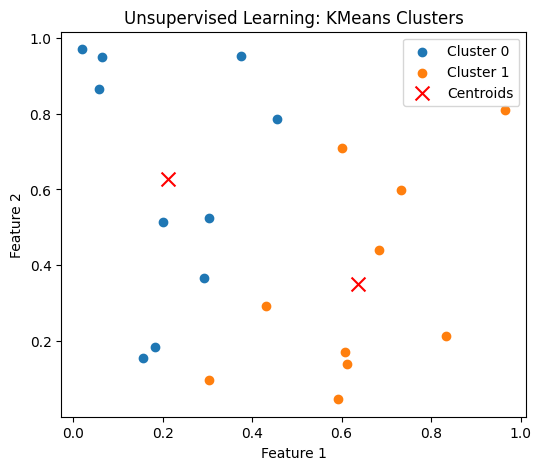

In [3]:
# Example: Simple supervised vs unsupervised demo
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

# -------------------
# Supervised Learning
# -------------------
print("=== Supervised Learning Example ===")
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([2,4,6,8,10])  # labeled outputs

model = LinearRegression().fit(X,y)
prediction = model.predict([[6]])[0]

print("Training data X:", X.ravel())
print("Training labels y:", y)
print("Prediction for input [6]:", round(prediction, 2))

# ---------------------
# Unsupervised Learning
# ---------------------
print("\n=== Unsupervised Learning Example ===")
X_unsup = np.random.rand(20,2)  # random 2D points

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_unsup)
labels = kmeans.labels_

print("Cluster centers:\n", np.round(kmeans.cluster_centers_, 2))
print("Cluster labels for points:", labels)

# Plot clusters with legend
plt.figure(figsize=(6,5))
for cluster_id in np.unique(labels):
    plt.scatter(X_unsup[labels==cluster_id, 0], 
                X_unsup[labels==cluster_id, 1], 
                label=f"Cluster {cluster_id}")
    
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='red', marker='x', s=100, label="Centroids")

plt.title("Unsupervised Learning: KMeans Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

**Q2. Explain overfitting and underfitting. How can we prevent them?**

- **Underfitting**: model too simple → high bias, misses patterns.  
- **Overfitting**: model too complex → high variance, memorizes noise.  

### 🔹 Prevention techniques:
- Cross-validation  
- Regularization (L1/L2)  
- Dropout (neural nets)  
- Early stopping  
- More training data  


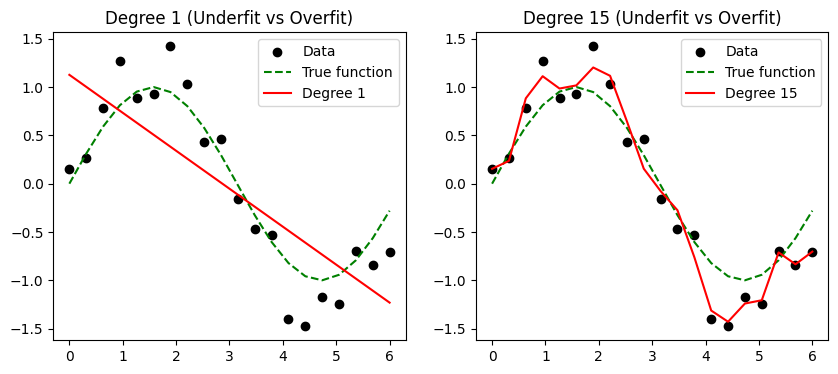

In [4]:
# Example: Overfitting vs Underfitting with polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)
X = np.linspace(0, 6, 20)
y_true = np.sin(X)
y = y_true + np.random.normal(scale=0.3, size=len(X))
X = X.reshape(-1,1)

degrees = [1, 15]
plt.figure(figsize=(10,4))

for i, deg in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.subplot(1,2,i)
    plt.scatter(X, y, color="black", label="Data")
    plt.plot(X, y_true, "g--", label="True function")
    plt.plot(X, y_pred, "r", label=f"Degree {deg}")
    plt.legend()
    plt.title(f"Degree {deg} (Underfit vs Overfit)")

plt.show()


**Q3. What are the main types of regression algorithms?**

### 🔹 Linear Regression
- **Model:** $$\hat{y} = w^\top x + b$$
- **Loss (MSE):** $$\min_{w,b} \; \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$
- Captures a **straight-line** relationship between features and target.

### 🔹 Polynomial Regression
- Map inputs to powers: $$\phi(x) = [1, x, x^2, \dots, x^d]$$ and apply linear regression on \(\phi(x)\).  
- Fits **curved** relationships while staying linear in parameters.

### 🔹 Regularized Regression (to control overfitting)
- **Ridge (L2):** $$\min_{w,b} \; \frac{1}{n}\sum (y_i - \hat{y}_i)^2 + \lambda\,\|w\|_2^2$$
- **Lasso (L1):** $$\min_{w,b} \; \frac{1}{n}\sum (y_i - \hat{y}_i)^2 + \lambda\,\|w\|_1$$  
Ridge **shrinks** weights; Lasso can **set some weights to zero** (feature selection).

---

### 🔹 Example: Compare Linear, Polynomial, Ridge, and Lasso
We’ll create a **nonlinear** dataset and evaluate each model on a held-out test set using **MAE** and **R²**.

   Linear Regression -> MAE: 1.242 | R^2: 0.369
  Polynomial (deg=2) -> MAE: 0.442 | R^2: 0.914
   Ridge (deg=2, L2) -> MAE: 0.441 | R^2: 0.914
   Lasso (deg=2, L1) -> MAE: 0.441 | R^2: 0.915


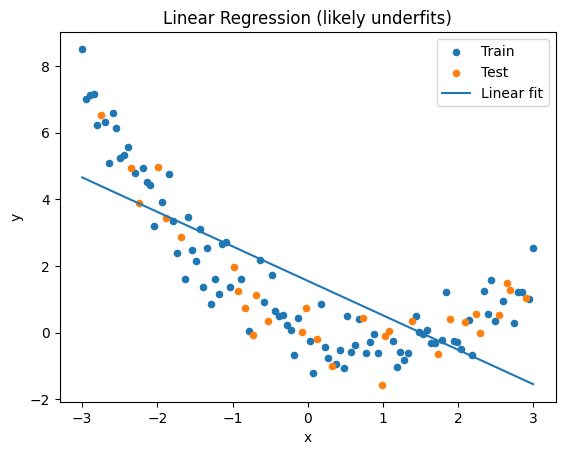

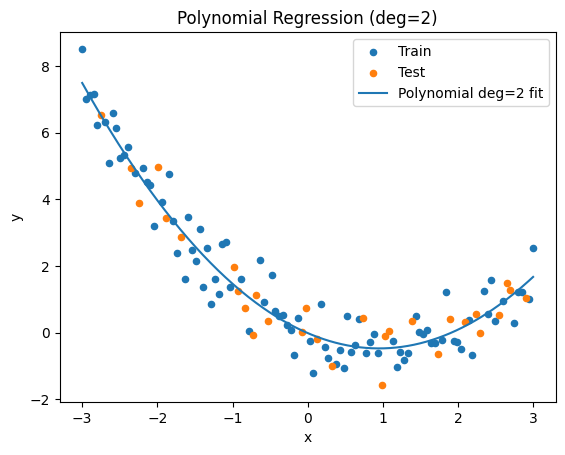

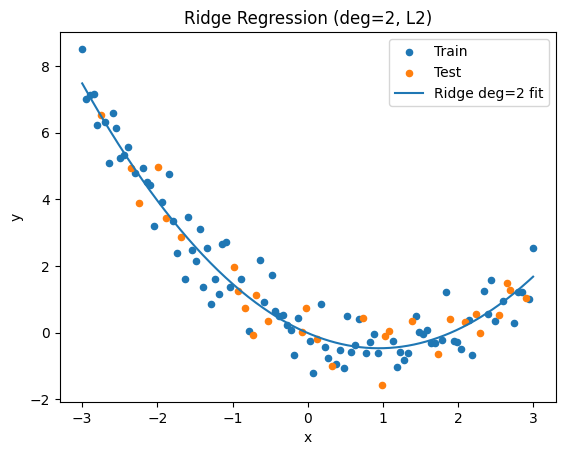

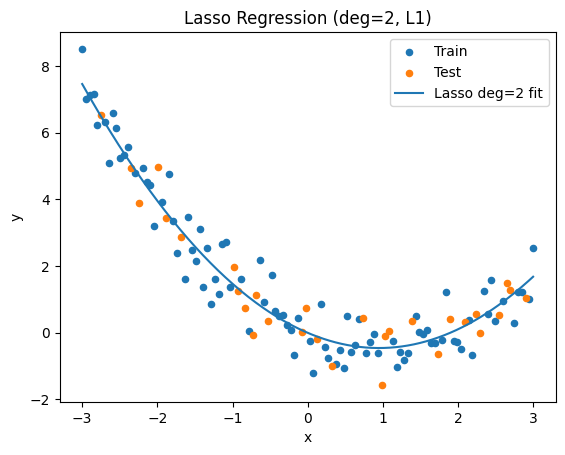

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Reproducibility
np.random.seed(7)

# ----- Synthetic nonlinear data -----
# True function: y = 0.5 x^2 - x + noise
X = np.linspace(-3, 3, 120).reshape(-1, 1)
y_true = 0.5 * X[:, 0]**2 - 1.0 * X[:, 0]
y = y_true + np.random.normal(scale=0.6, size=len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Helper to train, predict, and report metrics
def fit_report(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:>20} -> MAE: {mae:.3f} | R^2: {r2:.3f}")
    return model

# Models
lin = fit_report(LinearRegression(), "Linear Regression")
poly2 = fit_report(make_pipeline(PolynomialFeatures(2), LinearRegression()), "Polynomial (deg=2)")
ridge2 = fit_report(make_pipeline(PolynomialFeatures(2), Ridge(alpha=1.0, random_state=7)), "Ridge (deg=2, L2)")
lasso2 = fit_report(make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.02, max_iter=10000, random_state=7)), "Lasso (deg=2, L1)")

# Grid for smooth curves
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Plot 1: Linear Regression
plt.figure()
plt.scatter(X_train, y_train, s=20, label="Train")
plt.scatter(X_test, y_test, s=20, label="Test")
plt.plot(X_plot, lin.predict(X_plot), label="Linear fit")
plt.title("Linear Regression (likely underfits)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot 2: Polynomial (deg=2)
plt.figure()
plt.scatter(X_train, y_train, s=20, label="Train")
plt.scatter(X_test, y_test, s=20, label="Test")
plt.plot(X_plot, poly2.predict(X_plot), label="Polynomial deg=2 fit")
plt.title("Polynomial Regression (deg=2)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot 3: Ridge (deg=2)
plt.figure()
plt.scatter(X_train, y_train, s=20, label="Train")
plt.scatter(X_test, y_test, s=20, label="Test")
plt.plot(X_plot, ridge2.predict(X_plot), label="Ridge deg=2 fit")
plt.title("Ridge Regression (deg=2, L2)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot 4: Lasso (deg=2)
plt.figure()
plt.scatter(X_train, y_train, s=20, label="Train")
plt.scatter(X_test, y_test, s=20, label="Test")
plt.plot(X_plot, lasso2.predict(X_plot), label="Lasso deg=2 fit")
plt.title("Lasso Regression (deg=2, L1)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


**Q4. Placeholder for classification algorithms (to be expanded).**

**Q5. Placeholder for cross-validation (to be expanded).**

**Q6. Placeholder for bias-variance in ML (to be expanded).**

**Q7. Placeholder for confusion matrix and metrics (to be expanded).**

**Q8. Placeholder for ROC and AUC (to be expanded).**